# MEDIDAS DE DISPERSIÓN

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
penguins_df = sns.load_dataset('penguins')
penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


## RANGOS

In [3]:
penguins_df.min(numeric_only=True)

,0
bill_length_mm,32.1
bill_depth_mm,13.1
flipper_length_mm,172.0
body_mass_g,2700.0


In [4]:
penguins_df.max(numeric_only=True)

,0
bill_length_mm,59.6
bill_depth_mm,21.5
flipper_length_mm,231.0
body_mass_g,6300.0


In [6]:
rango = penguins_df.max(numeric_only=True) - penguins_df.min(numeric_only=True)
rango

,0
bill_length_mm,27.5
bill_depth_mm,8.4
flipper_length_mm,59.0
body_mass_g,3600.0


## DESVIACIÓN STANDARD

In [7]:
penguins_df.std(numeric_only=True)

,0
bill_length_mm,5.459584
bill_depth_mm,1.974793
flipper_length_mm,14.061714
body_mass_g,801.954536


In [9]:
penguins_df.mean(numeric_only=True) +  penguins_df.std(numeric_only=True)

,0
bill_length_mm,49.381514
bill_depth_mm,19.125963
flipper_length_mm,214.976918
body_mass_g,5003.708922


## RANGO INTERCUARTILICO

# Q1 - 25%

In [10]:
penguins_df.quantile(0.25,numeric_only=True)

,0.25
bill_length_mm,39.225
bill_depth_mm,15.600
flipper_length_mm,190.000
body_mass_g,3550.000


In [11]:
penguins_df.quantile(0.75,numeric_only=True) - penguins_df.quantile(0.25,numeric_only=True)

,0
bill_length_mm,9.275
bill_depth_mm,3.100
flipper_length_mm,23.000
body_mass_g,1200.000


In [13]:
(
    penguins_df
    .quantile(q=[0.75,0.50,0.25],numeric_only=True)
    .transpose()
    .rename_axis('metric')
    .reset_index()
    .assign(
        iqr = lambda df: df[0.75] - df[0.25]
    )
)

,metric,0.75,0.5,0.25,iqr
0,bill_length_mm,48.5,44.45,39.225,9.275
1,bill_depth_mm,18.7,17.30,15.600,3.100
2,flipper_length_mm,213.0,197.00,190.000,23.000
3,body_mass_g,4750.0,4050.00,3550.000,1200.000


# GRAFICAMOS TODOS LAS MEDIDAS

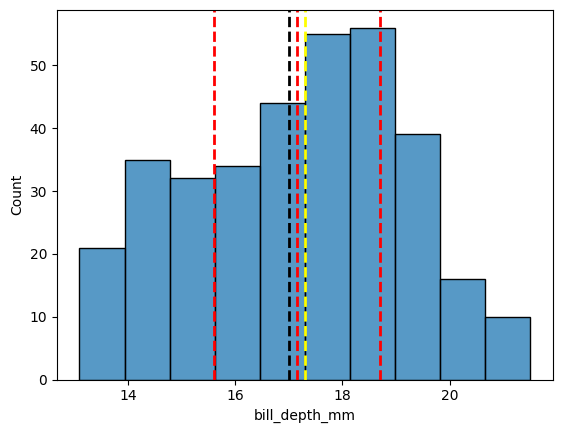

In [16]:
sns.histplot(
    data=penguins_df,
    x='bill_depth_mm'
)
plt.axvline(
    x=penguins_df.bill_depth_mm.mean(),
    color='red',
    linestyle='dashed',
    linewidth = 2
)
plt.axvline(
    x=penguins_df.bill_depth_mm.median(),
    color = 'yellow',
    linestyle = 'dashed',
    linewidth = 2
)
plt.axvline(
    x=penguins_df.bill_depth_mm.mode().values[0],
    color = 'black',
    linestyle = 'dashed',
    linewidth = 2
)
plt.axvline(
    x=penguins_df.bill_depth_mm.quantile(0.25),
    color='red',
    linestyle='dashed',
    linewidth=2
)
plt.axvline(
    x=penguins_df.bill_depth_mm.quantile(0.75),
    color='red',
    linestyle='dashed',
    linewidth=2
)